In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
%matplotlib inline
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

First import any necessary packages


In [2]:
beerData = pd.read_csv('beer_reviews.csv')

Read in the data

In [39]:
beerData

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


# <center>Plots </center>

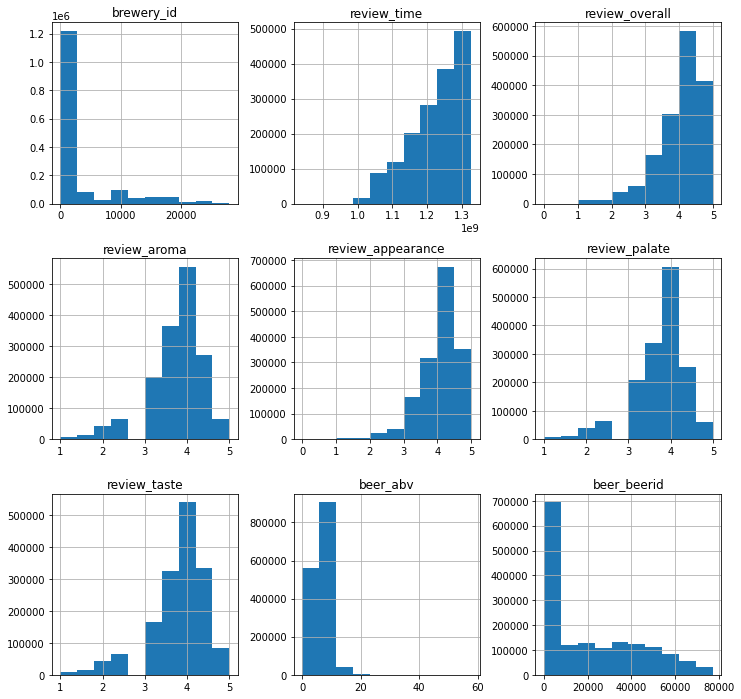

In [3]:
beerData.hist(figsize=(12, 12))
plt.show()

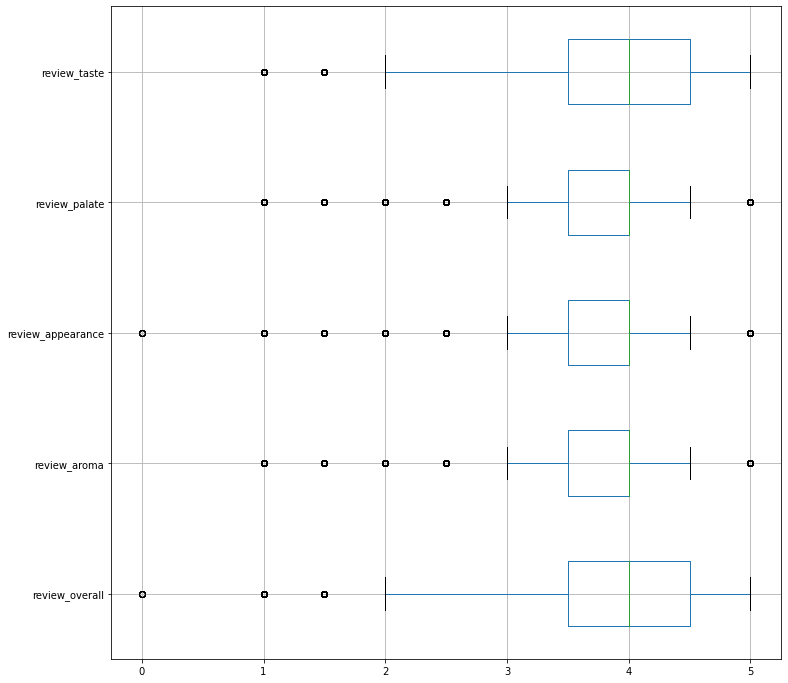

In [4]:
beerData.drop(['review_time', 'brewery_id', 'beer_beerid', 'beer_abv'], axis = 1).boxplot(figsize=(12, 12), vert=False)
plt.show()

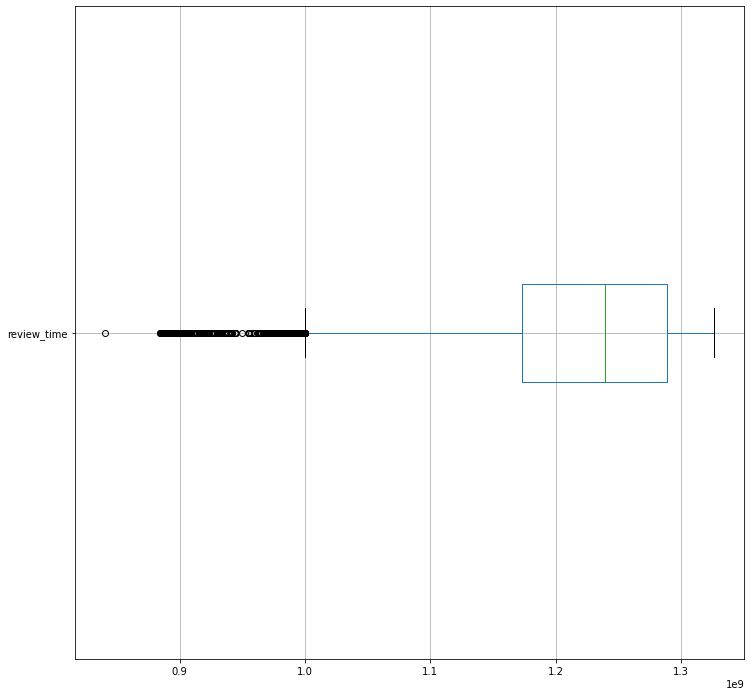

In [5]:
beerData.loc[:,['review_time']].boxplot(figsize=(12, 12), vert=False)
plt.show()

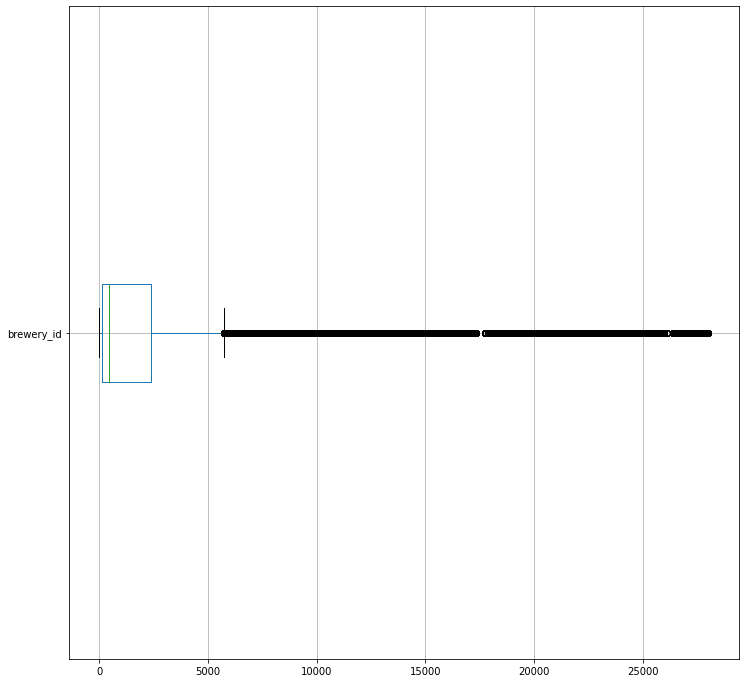

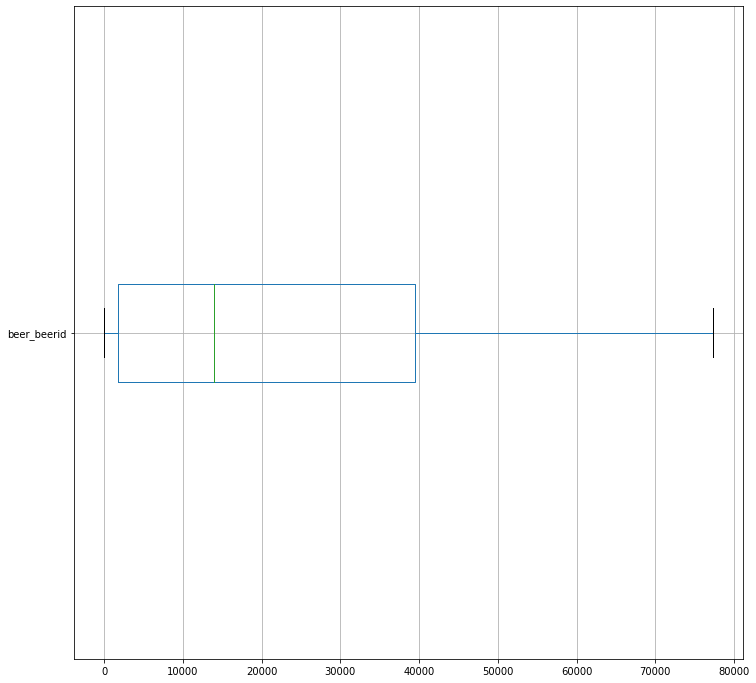

In [6]:
beerData.loc[:,['brewery_id']].boxplot(figsize=(12, 12), vert=False)
plt.show()
beerData.loc[:,['beer_beerid']].boxplot(figsize=(12, 12), vert=False)
plt.show()

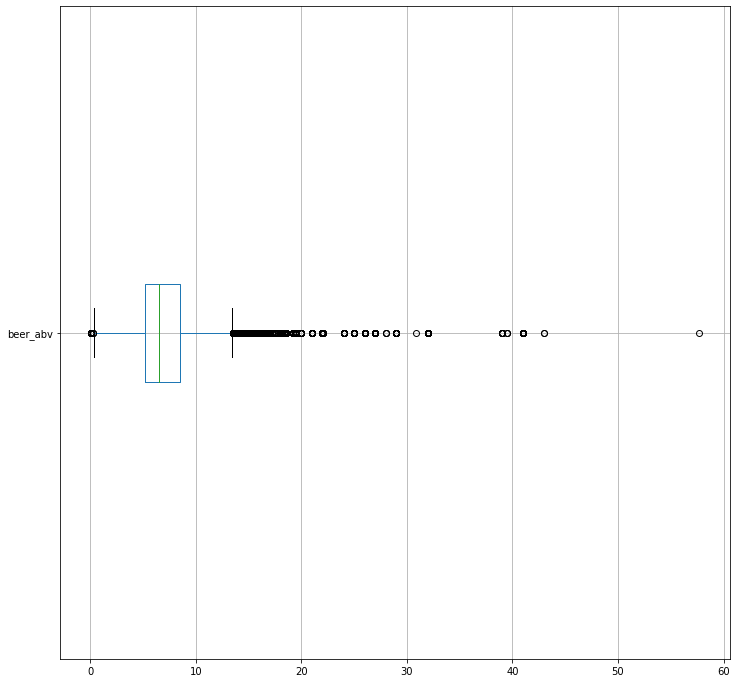

In [7]:
beerData.loc[:,['beer_abv']].boxplot(figsize=(12, 12), vert=False)
plt.show()

Notes:
Most review times are more recent since the graph is skewed to the left <br>
Most reviewes are 4 and skewed to the left <br>
The beer alcohol by volume is skewed to the right meaning that most beers have less than 10 % alcohol <br>
The beer_beerid and brewery shows that there are a subset of beers and breweries that are the most popular

In [8]:
beerData.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1586614.00000,1586614.00000,1586614.00000,1586614.00000,1586614.00000,1586614.00000,1586614.00000,1518829.00000,1586614.00000
mean,3130.09920,1224089280.01221,3.81558,3.73564,3.84164,3.74370,3.79286,7.04239,21712.79428
std,5578.10399,76544274.53924,0.72062,0.69762,0.61609,0.68222,0.73197,2.32253,21818.33600
min,1.00000,840672001.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.01000,3.00000
25%,143.00000,1173224188.25000,3.50000,3.50000,3.50000,3.50000,3.50000,5.20000,1717.00000
50%,429.00000,1239202881.50000,4.00000,4.00000,4.00000,4.00000,4.00000,6.50000,13906.00000
75%,2372.00000,1288568405.25000,4.50000,4.00000,4.00000,4.00000,4.50000,8.50000,39441.00000
max,28003.00000,1326285348.00000,5.00000,5.00000,5.00000,5.00000,5.00000,57.70000,77317.00000


Get the descriptive statistics of our dataset <br>

From the above, we can see that there are missing values in the 'beer_abv' column. We will ensure that this will be handled in question 1.<br>

We can also see that review overall and review appearance have ratings below 0. This means that there are some faulty reviews out there y'all

In [9]:
zeroReviewIndices = beerData[[a or b for a, b in zip(beerData['review_appearance'] < 1, beerData['review_overall'] < 1)]].index
beerData.drop(zeroReviewIndices, inplace=True)
zeroReviewIndices

Int64Index([37234, 39648, 39667, 653695, 653706, 653726, 653740], dtype='int64')

Next, we drop any reviews that have a rating less than 1 or greater than 5 since the ratings should only be from 1-5 <br>
We see that there were 7 faulty reviews that have been removed

In [10]:
beerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586607 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586607 non-null  int64  
 1   brewery_name        1586592 non-null  object 
 2   review_time         1586607 non-null  int64  
 3   review_overall      1586607 non-null  float64
 4   review_aroma        1586607 non-null  float64
 5   review_appearance   1586607 non-null  float64
 6   review_profilename  1586259 non-null  object 
 7   beer_style          1586607 non-null  object 
 8   review_palate       1586607 non-null  float64
 9   review_taste        1586607 non-null  float64
 10  beer_name           1586607 non-null  object 
 11  beer_abv            1518822 non-null  float64
 12  beer_beerid         1586607 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 169.5+ MB


From the above, we find that there is a discrepancy between the number of brewery_id and the number of brewery_names<br>
I would think that these should be the same. This means there may be null data

In [11]:
beerData[beerData.loc[:, 'brewery_name'].isnull()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
651565,1193,NaN,1301022066,2.0,2.5,2.5,Knapp85,Vienna Lager,1.5,1.5,Engel Tyrolian Bräu WRONG BREWERY SEE SCHWABIS...,5.0,67503
659293,1193,NaN,1290107698,4.0,4.5,3.5,dqrull,Bock,4.0,3.5,Engel Bock Dunkel WRONG BREWERY SEE CRAILSHEIMER,7.2,63658
659299,1193,NaN,1289077001,3.5,3.0,3.0,dqrull,Dortmunder / Export Lager,4.0,4.0,Engel Gold WRONG BREWERY SEE CRAILSHEIMER,5.4,63215
659300,1193,NaN,1289851033,3.5,4.0,3.5,dqrull,Munich Helles Lager,3.5,3.0,Engel Landbier WRONG BREWERY SEE CRAILSHEIMER,4.8,63557
659301,1193,NaN,1289158632,3.5,4.0,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,3.5,Engel Keller Hell WRONG BREWERY SEE CRAILSHEIMER,5.4,63256
659302,1193,NaN,1289590065,3.5,4.0,3.0,dqrull,Vienna Lager,3.0,3.5,Engel Aloisius - WRONG BREWERY SEE CRAILSHEIMER,5.9,63459
659303,1193,NaN,1298078926,3.0,3.0,3.0,Ochsenblut,Keller Bier / Zwickel Bier,2.0,3.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659304,1193,NaN,1292423271,4.5,4.0,4.0,Dentist666,Keller Bier / Zwickel Bier,4.0,4.5,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659305,1193,NaN,1289329962,3.5,3.5,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,4.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
1391043,27,NaN,1020244856,3.5,3.5,3.5,Jason,American Adjunct Lager,4.0,3.5,Hard Hat American Beer,3.8,60


From here, we can see that brewery id 1193 and brewery id 27 have no brewery name
We check to make sure that these breweries really have no name by getting all of the reviews from brewery id 1193 and brewery id 27 and seeing if any name appears

In [12]:
beerData[[a or b for a, b in zip(beerData['brewery_id'] == 27, beerData['brewery_id'] == 1193)]]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
651565,1193,NaN,1301022066,2.0,2.5,2.5,Knapp85,Vienna Lager,1.5,1.5,Engel Tyrolian Bräu WRONG BREWERY SEE SCHWABIS...,5.0,67503
659293,1193,NaN,1290107698,4.0,4.5,3.5,dqrull,Bock,4.0,3.5,Engel Bock Dunkel WRONG BREWERY SEE CRAILSHEIMER,7.2,63658
659299,1193,NaN,1289077001,3.5,3.0,3.0,dqrull,Dortmunder / Export Lager,4.0,4.0,Engel Gold WRONG BREWERY SEE CRAILSHEIMER,5.4,63215
659300,1193,NaN,1289851033,3.5,4.0,3.5,dqrull,Munich Helles Lager,3.5,3.0,Engel Landbier WRONG BREWERY SEE CRAILSHEIMER,4.8,63557
659301,1193,NaN,1289158632,3.5,4.0,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,3.5,Engel Keller Hell WRONG BREWERY SEE CRAILSHEIMER,5.4,63256
659302,1193,NaN,1289590065,3.5,4.0,3.0,dqrull,Vienna Lager,3.0,3.5,Engel Aloisius - WRONG BREWERY SEE CRAILSHEIMER,5.9,63459
659303,1193,NaN,1298078926,3.0,3.0,3.0,Ochsenblut,Keller Bier / Zwickel Bier,2.0,3.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659304,1193,NaN,1292423271,4.5,4.0,4.0,Dentist666,Keller Bier / Zwickel Bier,4.0,4.5,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659305,1193,NaN,1289329962,3.5,3.5,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,4.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
1391043,27,NaN,1020244856,3.5,3.5,3.5,Jason,American Adjunct Lager,4.0,3.5,Hard Hat American Beer,3.8,60


# Indeed, there are no names. So we will replace these NaNs with their brewery id

In [13]:
beerData['brewery_name'] = beerData['brewery_name'].fillna(beerData['brewery_id'])

In [14]:
beerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586607 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586607 non-null  int64  
 1   brewery_name        1586607 non-null  object 
 2   review_time         1586607 non-null  int64  
 3   review_overall      1586607 non-null  float64
 4   review_aroma        1586607 non-null  float64
 5   review_appearance   1586607 non-null  float64
 6   review_profilename  1586259 non-null  object 
 7   beer_style          1586607 non-null  object 
 8   review_palate       1586607 non-null  float64
 9   review_taste        1586607 non-null  float64
 10  beer_name           1586607 non-null  object 
 11  beer_abv            1518822 non-null  float64
 12  beer_beerid         1586607 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 169.5+ MB


In [15]:
print(beerData.isnull().sum())

brewery_id                0
brewery_name              0
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64


We see that there are still missing Review Profile Names, but as we can not uniquely identify the reviewer with other columns, we won't be able to tell if there have been additional duplicate reviews by the same reviewer

There are also missing beer_abv (beer alcohol by volume. We must remove these rows if it is relevant to the question we are asking. Otherwise, the other columns are still perfectly good data

In [16]:
beerData.nunique()

brewery_id               5840
brewery_name             5744
review_time           1577953
review_overall              9
review_aroma                9
review_appearance           9
review_profilename      33387
beer_style                104
review_palate               9
review_taste                9
beer_name               56857
beer_abv                  530
beer_beerid             66055
dtype: int64

# Next we check if there are any duplicate reviews
When there are duplicate values, we only want to keep the most recently updated one<br>
We keep the review_time that is the highest (most recent)

In [17]:
beerData.drop_duplicates(subset=['review_profilename', 'beer_name'], keep='last', inplace=True)

For the following Questions<br><br>

We can remove the 'beer_beerid' column, since it's just a psuedonym of the 'beer_name' column and we want the actual beer name rather than the beer id<br>
We can remove the 'brewery_id' column, since it's just a psuedonym of the 'brewery_name' column and we want the actual brewery name rather than the brewery id<br>
We can remove the 'review_time' column, since the questions don't require time-series analysis and beers don't really change over the years <br>
We can remove the 'review_profilename' column since we only needed it to check for preprocessing and removing duplicate reviews by the same reviewer


In [18]:
# beerData.drop(['brewery_id', 'review_time', 'review_profilename', 'beer_beerid'], axis = 1, inplace=True)

# <center>Question 1</center>
#  Which brewery produces the strongest beers by ABV%?

Normally, I would just take the median and mean of each brewery and pick the brewery with the highest values.
But since the question states the strongest "beers" and not the just "beer", we have to quantify what subset of the data counts as "strong", and once we have this subset, we can then take the median and mean of these breweries.

We will assume that "strong" means the top 99% of alcoholic percentages

In a real project, I would talk with my team and clients to better quantify "strong".

Ensure that we only choose breweries that have over a certain threshold of reviews and a certain threshold of unique reviewers.

We want the strongest drinks, so we look for a threshold of what alcohol % threshold by viewing a cumulative histogram


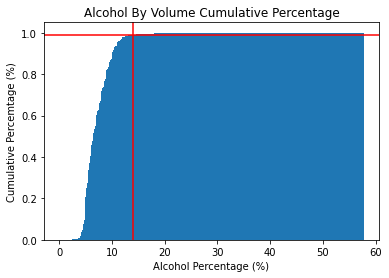

In [19]:
fig = plt.figure()
plt.hist(beerData['beer_abv'], cumulative=True, align='right', bins=1000, density=True)
# plt.xlabel = "Alcohol Percentage (%)"
plt.xlabel("Alcohol Percentage (%)")
plt.ylabel("Cumulative Percemtage (%)")
plt.title("Alcohol By Volume Cumulative Percentage")
plt.axhline(0.99, color = "r")
plt.axvline(sorted(list(beerData['beer_abv'].dropna()))[int(beerData.dropna().shape[0]*0.99)], color = "r")

plt.show()

The above graph is a cumulative distribution based on the alcohol percentages of all the beers in our data <br>

The horizontal line is the 99% percentile in general <br><br>
The vertical line from the intersection of the horizontal line with our data (the blue) is the threshold of the alcohol percentage that indicates that 99% of beers have a alcohol percentage at most the value of the vertical line<br>

We can see that the vertical line intersects the x-axis at around 14-15.

We calculate the exact intersection by sorting the alcohol by volume data and getting the 99th quantile.

In [20]:
sortedBeerABVsorted = sorted(list(beerData['beer_abv'].dropna()))
sortedBeerABVsorted[int(len(sortedBeerABVsorted) * 0.99)]

14.0

Therefore, the threshold for the top 99% of alcohol percentage is 14.0

In [21]:
beerDataOverThreshold = beerData[beerData['beer_abv'] > 14]

beerDataOverThreshold.dropna(inplace= True)

We filter the beer data by the above threshold and remove any reviews whose beer has a NaN value for the alcohol by beverage

## Now we get the median and mean values of all beers from a brewery that have been filtered by the beer alcohol percentage threshold

In [22]:
groupedMean = beerDataOverThreshold.groupby(by = 'brewery_name', as_index=False).agg({'beer_abv': 'mean', 'review_profilename': pd.Series.nunique, 'review_overall': 'count'}).rename(columns={'review_profilename': 'unique_reviewers', 'review_overall': 'total_reviews'})

Group the reviews by the breweries and get the mean average of the alcohol by volume of all beers sold at each brewery

In [23]:
# If the data does not have at least 10 unique reviewers and 10 reviews, then remove it
insufficientReviewsIndex = groupedMean[[a or b for a, b in zip(groupedMean['unique_reviewers'] < 10, groupedMean['total_reviews'] < 10)]].index
groupedMean.drop(insufficientReviewsIndex, inplace=True)

Remove any breweries that have less than 10 reviews or have less than 10 unique reviewers reviewing the brewery

In [24]:
topTenMeans = groupedMean.drop(['unique_reviewers', 'total_reviews'], axis = 1).sort_values(by = ['beer_abv'], ascending=False).head(10)
topTenMeans

,brewery_name,beer_abv
53,Schorschbräu,29.913846
31,Hair of the Dog Brewing Company / Brewery and ...,29.000000
17,De Struise Brouwers,26.277778
12,BrewDog,25.866667
11,Boston Beer Company (Samuel Adams),21.188167
21,DuClaw Brewing Company,20.018113
60,Sonoran Brewing Company,19.441290
13,Bristol Brewing Company,18.400000
61,Southampton Publick House,18.000000
40,Mikkeller ApS,17.595322


Get the top ten breweries who sell the strongest beers for visualization

Text(0.5, 1.0, 'Top Ten Breweries For Strong Beers (Mean)')

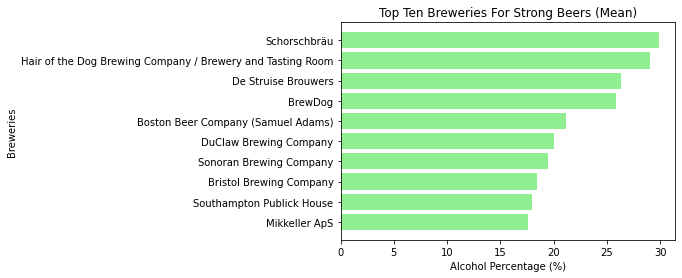

In [25]:
plt.barh(topTenMeans.sort_values(by = "beer_abv")['brewery_name'], topTenMeans.sort_values(by = "beer_abv")['beer_abv'], color = 'lightgreen')
plt.xlabel("Alcohol Percentage (%)")
plt.ylabel("Breweries")
plt.title("Top Ten Breweries For Strong Beers (Mean)")

# Here we can see that "Schorschbräu" has the highest  mean alcohol by beverge when we consider all beers with above 14.0 ABV

In [26]:
groupedMedian = beerDataOverThreshold.groupby(by = 'brewery_name', as_index=False).agg({'beer_abv': 'median', 'review_profilename': pd.Series.nunique, 'review_overall': 'count'}).rename(columns={'review_profilename': 'unique_reviewers', 'review_overall': 'total_reviews'})

Group the reviews by the breweries and get the median of the alcohol by volume of all beers sold at each brewery

In [27]:
# If the data does not have at least 10 unique reviewers and 10 reviews, then remove it
insufficientReviewsIndex = groupedMedian[[a or b for a, b in zip(groupedMedian['unique_reviewers'] < 10, groupedMedian['total_reviews'] < 10)]].index
groupedMedian.drop(insufficientReviewsIndex, inplace=True)

Remove any breweries that have less than 10 reviews or have less than 10 unique reviewers reviewing the brewery

In [28]:
topTenMedians = groupedMedian.drop(['unique_reviewers', 'total_reviews'], axis = 1).sort_values(by = ['beer_abv'], ascending=False).head(10)
topTenMedians

,brewery_name,beer_abv
53,Schorschbräu,30.86
31,Hair of the Dog Brewing Company / Brewery and ...,29.00
17,De Struise Brouwers,26.00
21,DuClaw Brewing Company,21.92
60,Sonoran Brewing Company,19.50
13,Bristol Brewing Company,18.40
12,BrewDog,18.20
19,Dogfish Head Brewery,18.00
61,Southampton Publick House,18.00
11,Boston Beer Company (Samuel Adams),17.50


Get the top ten breweries who sell the strongest beers for visualization

Text(0.5, 1.0, 'Top Ten Breweries For Strong Beers (Median)')

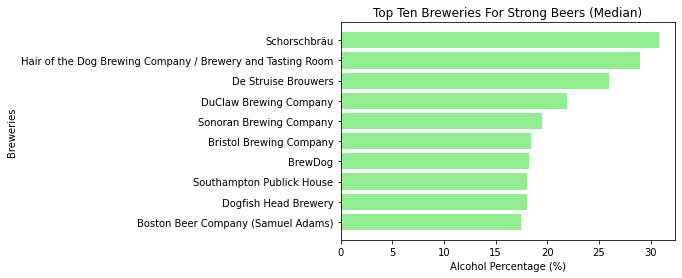

In [29]:
plt.barh(topTenMedians.sort_values(by = "beer_abv")['brewery_name'], topTenMedians.sort_values(by = "beer_abv")['beer_abv'], color='lightgreen')
plt.xlabel("Alcohol Percentage (%)")
plt.ylabel("Breweries")
plt.title("Top Ten Breweries For Strong Beers (Median)")

# Here we can see that "Schorschbräu" has the highest  median alcohol by beverge when we consider all beers with above 14.0 ABV

# Therefore I can conclude that the brewery of "Schorschbräu" has the strongest drinks

Note: Since there were NAN values that we removed, one of these beers may have a higher alcohol by volume than the Schorschbräu

# <center>Question 2</center>
# If you had to pick 3 beers to recommend using only this data, which would you pick?

The goal here is to create a recommendation system<br>
Each user and beer become uniquely identified by 7 corresponding attributes between the user and beer. <br>
The user attributes consist of how important they want a beer's overall value, aroma, appearance, taste, palate, popularity, and alcohol by volume.<br>
The beer attributes consist of the average rating of the beer's overall value, aroma, appearance, taste, palate, popularity, and alcohol by volume.<br>



We could think of this as points or vectors in a vector space. To recommend 3 drinks, we find a user in the space and get the closest distance to the 3 nearest drinks using the Euclidean Distance.



Here is an example

Text(0.5, 0, 'Palate')

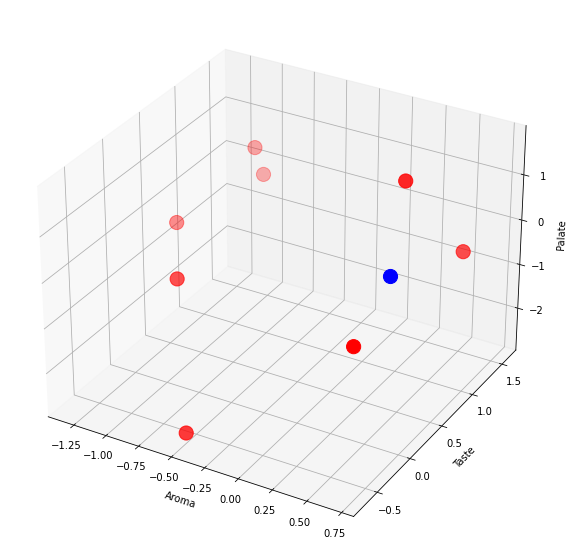

In [30]:
np.random.seed(11)
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = np.random.randn(8)
xdata = np.random.randn(8)
ydata = np.random.randn(8)
ax.scatter3D(xdata, ydata, zdata, c="red", s = 200);


ax.scatter3D(np.random.randn(), np.random.randn(), np.random.randn(), c = "blue", s = 200)
plt.xlabel("Aroma")
plt.ylabel("Taste")
ax.set_zlabel("Palate")

For visualization, if the users are the blue points and the beers are the red points, then to recommend three beers for the single blue user, we would recommend the three red points on the very right.

In [31]:
beerDataWithCount = beerData.copy()
beerDataBeerCount = beerDataWithCount.groupby(by = "beer_beerid", as_index=False).aggregate({"review_aroma":'count'}).rename(columns= {"review_aroma" : "drink_popularity"})

beerDataWithCount = pd.merge(beerDataWithCount, beerDataBeerCount, how = "left", on = "beer_beerid")

In [40]:
beerDataWithCount

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,drink_popularity,beer_style_median_abv
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,1,5.1
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,1,7.0
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,1,7.0
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,1,4.9
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,1,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561720,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061,14,6.0
1561721,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061,14,6.0
1561722,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061,14,6.0
1561723,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061,14,6.0


First, I group each all the reviews by the beer that was reviewed<br>

I then create a new feature called "drink_popularity" that will represent the amount of reviews this beer gets and therefore how popular this beer is to drink

In [32]:
beer_style_abv = beerDataWithCount.groupby(by = ["beer_style", 'beer_name']).first().groupby("beer_style").aggregate({"beer_abv" : "median"}).rename(columns = {"beer_abv": "beer_style_median_abv"})
beerDataWithCount = pd.merge(beerDataWithCount, beer_style_abv, how = "left", on = "beer_style")
beerDataWithCount['beer_abv'] = beerDataWithCount['beer_abv'].fillna(beerDataWithCount['beer_style_median_abv'])

Next, I get the median alcohol by beverage for each beer style.<br>

If there are beers that are missing the alochol by beverage, I replace the NaN values with the beer's beer style median alcohol by beverage.

In [33]:
reviewers = beerDataWithCount.groupby(by = 'review_profilename', as_index=False).agg({"review_overall": "mean", "review_aroma": "mean", "review_appearance": "mean", "review_palate" : "mean", "review_taste": "mean", "beer_abv": "mean", "drink_popularity" : "mean"})
reviewers['drink_popularity'] = reviewers['drink_popularity'] / max(reviewers['drink_popularity']) * 5

I group the reviews by each reviewer and get the average ratings of overall, aroma, appearance, palate, taste, beer_abv, and beer popularity from their respective reviews

In [34]:
beers = beerDataWithCount.groupby(by = "beer_name", as_index=False).agg({"review_overall": "mean", "review_aroma": "mean", "review_appearance": "mean", "review_palate" : "mean", "review_taste": "mean", "beer_abv": "mean","drink_popularity" : "mean"})
beers['drink_popularity'] = beers['drink_popularity'] / max(beers['drink_popularity']) * 5

I group the reviews by the beer reviewed and get the average ratings of overall, aroma, appearance, palate, taste and also the beer's alcohol by volume and the relative popularity calculated earlier

In [35]:
reviewers

,review_profilename,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,drink_popularity
0,0110x011,4.241007,4.169065,4.057554,4.046763,4.215827,8.558129,0.981026
1,01Ryan10,5.000000,5.000000,4.500000,5.000000,5.000000,7.000000,0.573745
2,02maxima,4.000000,3.875000,4.000000,4.250000,4.375000,8.725000,1.701356
3,03SVTCobra,3.000000,2.833333,3.333333,3.333333,3.000000,4.743333,1.145931
4,04101Brewer,4.166667,3.333333,3.333333,3.666667,3.333333,5.466667,0.235423
...,...,...,...,...,...,...,...,...
33382,zymurgy4all,3.811828,3.768817,3.811828,3.677419,3.892473,5.641398,0.900232
33383,zymurgywhiz,4.250000,4.250000,4.250000,4.000000,4.250000,6.050000,2.927191
33384,zythus,4.187500,3.875000,3.937500,4.500000,4.062500,5.462500,0.968195
33385,zyzygy,4.200000,4.100000,4.000000,3.900000,4.400000,7.990000,1.052697


In [36]:
beers

,beer_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,drink_popularity
0,! (Old Ale),4.000000,4.5,4.00,4.000000,4.5,8.2,0.001559
1,"""100""",4.000000,4.0,4.00,4.000000,4.4,10.0,0.007795
2,"""100"" Pale Ale",4.000000,4.0,3.50,4.000000,4.0,6.6,0.001559
3,"""12"" Belgian Golden Strong Ale",4.000000,3.5,4.25,4.750000,4.5,9.0,0.003118
4,"""33"" Export",3.000000,3.0,3.00,3.166667,3.0,4.8,0.004677
...,...,...,...,...,...,...,...,...
56852,Žamberecký Kanec Imperial Stout,3.750000,4.5,4.50,4.250000,4.0,5.5,0.003118
56853,Ω-naught (Omeganaught),4.166667,4.0,4.00,3.500000,3.5,5.0,0.004677
56854,“Chewy” Double IPA,2.500000,2.0,4.00,3.500000,2.5,6.9,0.001559
56855,横須賀ビアサケ (Yokosuka Biasake),4.000000,3.5,3.00,3.500000,3.5,5.5,0.001559


We can think of each beer and reviewer to be a 7-dimensional vector/point on a 7-dimensional vector space

In order to make recommendations, we can choose a reviewer vector/point and find the 3 nearest beer vectors/points by calculating the euclidean distance between the reviewer and the nearby beers.

In [37]:
def lowestEuclideanDistanceBeers(reviewer_attributes, index):   
#     print(list(np.asarray(reviewer_attributes)))
    distances = np.linalg.norm(np.asarray(beers.drop('beer_name', axis = 1)) - list(np.asarray(reviewer_attributes)), axis = 1)
    index_distances = [(index, distance) for index, distance in enumerate(distances)]
    sorted_index_distances = sorted(index_distances, key = lambda x: x[1])

    return beers.loc[sorted_index_distances[index][0], 'beer_name']


We define a function to return the closest beers to a reviewer by the euclidean distance<br><br>
The function subtracts a specific reviewer vector with all the vectors representing beers and calculates the length of the corresponding complement vectors and orders them to find a recommendation

In [577]:
recommendations = reviewers.loc[:, ['review_profilename']]

recommendations['First Rec'] = reviewers.apply(lambda x: lowestEuclideanDistanceBeers(x.drop('review_profilename'), 0), axis = 1)
recommendations['Second Rec'] = reviewers.apply(lambda x: lowestEuclideanDistanceBeers(x.drop('review_profilename'), 1), axis = 1)
recommendations['Third Rec'] = reviewers.apply(lambda x: lowestEuclideanDistanceBeers(x.drop('review_profilename'), 2), axis = 1)

I create a new table that has each reviewer and their corresponding three recommendations

In [47]:
recommendations

,review_profilename,First Rec,Second Rec,Third Rec
0,0110x011,Fuller's Vintage Ale,Lukcy 13asartd Ale,Corsendonk Christmas Ale
1,01Ryan10,Geronimo IPA,Highland Oak Aged Cold Mountain Winter,Brooklyn Manchester Star
2,02maxima,G'Knight Imperial Red Ale,Don de Dieu,Hibernation Ale
3,03SVTCobra,Grolsch Premium Lager,Killian's Irish Red,Widmer Hefeweizen
4,04101Brewer,Bierhalle Marzen,Rochester Mills Lazy Daze Lager,Bull Falls Oktoberfest
...,...,...,...,...
33382,zymurgy4all,Duck-Rabbit Milk Stout,Old #38 Stout,Festbier
33383,zymurgywhiz,Great Lakes Edmund Fitzgerald Porter,Chocolate Stout,Shakespeare Oatmeal Stout
33384,zythus,St. Bernardus Witbier,Hacker-Pschorr Hefe Weisse Natürtrub,Bender
33385,zyzygy,La Chouffe,Oro De Calabaza,Great Lakes Nosferatu


# Next I test the model by seeing how many recommendations are true recommendations

In [95]:
reviewedDrinks = {}


for x in tqdm(range(beerData.shape[0])):
    review = beerData.loc[x, :]
    reviewName = review['review_profilename']
    reviewedBeer = review['beer_name']
    if reviewName not in reviewedDrinks.keys():
        reviewedDrinks[reviewName] = []
    if reviewedBeer not in reviewedDrinks[reviewName]:
        reviewedDrinks[reviewName].append(reviewedBeer)


Here, I find each beer that each reviewer has recommended

In [108]:
def goodRecommendation(reviewerRecommendations):
    print(reviewerRecommendations)
    name = reviewerRecommendations['review_profilename']
    firstRecommendation = reviewerRecommendations['First Rec']
    secondRecommendation = reviewerRecommendations['Second Rec']
    thirdRecommendation = reviewerRecommendations['Third Rec']
    alreadyTried = 0
    if firstRec in reviewedDrinks[name]:
        alreadyTried += 1
    if secondRec in reviewedDrinks[name]:
        alreadyTried += 1
    if thirdRec in reviewedDrinks[name]:
        alreadyTried += 1
    return alreadyTried

This is a function that tests whether a reviewer has already tried out a beer that they have been recommended and returns the number of beers they have already reviewed

In [159]:
recommendations['already_tried'] = recommendations.apply(lambda x: goodRecommendation(x), axis = 1)

reviewersCount = beerData.groupby(by = "review_profilename", as_index = False).agg({"beer_style" : "count"}).rename(columns = {"beer_style": "num_reviews"})

In [123]:
namesAboveNineReviews = reviewersCount[reviewersCount['num_reviews'] >= 10]['review_profilename']

I filter the earlier recommendations list to only include reviewers that have already reviewed 10 beers are more

In [158]:
sum(list(recommendations[recommendations['review_profilename'].isin(list(namesAboveNineReviews))]['already_tried'])) / (len(namesAboveNineReviews) * 3)

0.20388530867656673

I then divide the number of recommendations that were already reviewed/tried by the total recommendations

So from this calculation, ~20% of the recommendations were beers that the respective reviewers have already reviewed/tried and the remaining 80% of the recommendations are new beers that the respective reviewers have not het reviewedtried

In [41]:
print("Please answer your preferences with input numbers in the range 1-5")
overall = float(input("Overall: "))
aroma = float(input("Aroma: "))
appearance = float(input("Appearance: "))
palate = float(input("Palate: "))
taste = float(input("Taste: "))
beer_abv = float(input("Alcohol by Volume: "))
drink_popularity = float(input("Drink Popularity Preference: "))

user = [overall, aroma, appearance, palate, taste, beer_abv, drink_popularity]

firstRec = lowestEuclideanDistanceBeers(user, 0)
secondRec = lowestEuclideanDistanceBeers(user, 1)
thirdRec = lowestEuclideanDistanceBeers(user, 2)

print("\n\n")
print("Overall: ", overall)
print("Aroma: ", aroma)
print("Appearance: ", appearance)
print("Palate: ", palate)
print("Taste: ", taste)
print("Alcohol by Volums: ", beer_abv)
print("Drink Popualrity Preference: ", drink_popularity)
print()
print("The first recommendation is: ", firstRec)
print("The second recommendation is: ", secondRec)
print("The third recommendation is: ", thirdRec)

Please answer your preferences with input numbers in the range 1-5
Overall: 5
Aroma: 1
Appearance: 1
Palate: 5
Taste: 4
Alcohol by Volume: 15
Drink Popularity Preference: 5



Overall:  5.0
Aroma:  1.0
Appearance:  1.0
Palate:  5.0
Taste:  4.0
Alcohol by Volums:  15.0
Drink Popualrity Preference:  5.0

The first recommendation is:  Bourbon County Brand Stout
The second recommendation is:  Olde School Barleywine
The third recommendation is:  Samichlaus Bier


# Therefore we created a recommmendation system that recommends beers to users based on 7 shared attributes

# <center>Question 3</center>
# Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

In [41]:
beerDataQualityFactors = beerData[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']]

Get the necessary variables only (Overall, Aroma, Apearance, Palate, Taste Reviews)

In [42]:
overall = beerDataQualityFactors['review_overall']
aroma = beerDataQualityFactors['review_aroma']
appearance = beerDataQualityFactors['review_appearance']
palate = beerDataQualityFactors['review_palate']
taste = beerDataQualityFactors['review_taste']

Get the individual columns for convenience 

In [43]:
correlations = beerDataQualityFactors.corr()

Get the correlations of each review with each other column

In [45]:
correlations = correlations.sort_values('review_overall', ascending=False)

Sort the correlations by the "overall review" column since we want to see which other review can best predict the overall review

<AxesSubplot:>

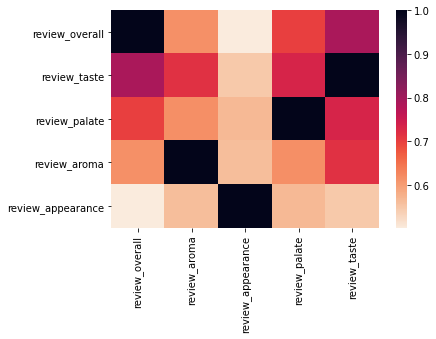

In [46]:
sns.heatmap(correlations, cmap = "rocket_r")

# From the heatmap, we can visually see the best predictor factor is taste
## <br>This is intuitive since taste has arguably the most powerful connection to memory

# Another approach is using Linear Algebra

In essence, each column could be interpreted as a high dimensional vector.<br>
I find the cosine angle and euclidean distance between these columns/vectors<br>
The higher the cosine angle, the greater the similarity between two columns/vectors<br>
When the cosine angle is 1, then the two columns are just multiples of one another<br>
The lower the euclidean distance, the lower the difference between two columns as points in a vector space<br>
When the euclidean distance is zero, the two columns are exactly the same<br>

In [48]:
taste_cosine_angle =  np.asarray(overall).dot(np.asarray(taste))/ (np.linalg.norm(overall) * np.linalg.norm(taste))
taste_euclidean_distance = np.linalg.norm(overall-taste)
print("Cosine Similarity of Overall Review and Taste Review")
print(taste_cosine_angle)
print("Euclidean Distance of Overall Review and Taste Review")
print(taste_euclidean_distance)
print()

palate_cosine_angle =  np.asarray(overall).dot(np.asarray(palate))/ (np.linalg.norm(overall) * np.linalg.norm(palate))
palate_euclidean_distance = np.linalg.norm(overall-palate)
print("Cosine Similarity of Overall Review and Palate Review")
print(palate_cosine_angle)
print("Euclidean Distance of Overall Review and Palate Review")
print(palate_euclidean_distance)
print()

aroma_cosine_angle =  np.asarray(overall).dot(np.asarray(aroma))/ (np.linalg.norm(overall) * np.linalg.norm(aroma))
aroma_euclidean_distance = np.linalg.norm(overall-aroma)
print("Cosine Similarity of Overall Review and Aroma Review")
print(aroma_cosine_angle)
print("Euclidean Distance of Overall Review and Aroma Review")
print(aroma_euclidean_distance)
print()

appearance_cosine_angle =  np.asarray(overall).dot(np.asarray(appearance))/ (np.linalg.norm(overall) * np.linalg.norm(appearance))
appearance_euclidean_distance = np.linalg.norm(overall-appearance)
print("Cosine Similarity of Overall Review and Appearance Review")
print(appearance_cosine_angle)
print("Euclidean Distance of Overall Review and Appearance Review")
print(appearance_euclidean_distance)
print()


Cosine Similarity of Overall Review and Taste Review
0.9926007642417072
Euclidean Distance of Overall Review and Taste Review
593.9934763951537

Cosine Similarity of Overall Review and Palate Review
0.9900618627013297
Euclidean Distance of Overall Review and Palate Review
689.6082221087564

Cosine Similarity of Overall Review and Aroma Review
0.9869163090155839
Euclidean Distance of Overall Review and Aroma Review
789.6393163970497

Cosine Similarity of Overall Review and Appearance Review
0.9849754260717498
Euclidean Distance of Overall Review and Appearance Review
848.7527614093518



Text(0.5, 1.0, 'Factors Cosine Similarity with Overall Review')

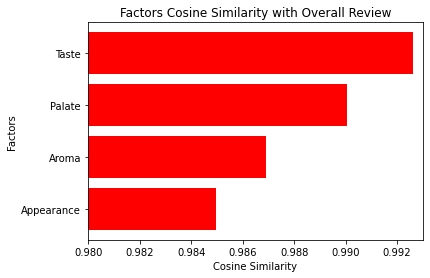

In [49]:
plt.barh(['Appearance', 'Aroma', 'Palate', 'Taste'], [appearance_cosine_angle, aroma_cosine_angle, palate_cosine_angle, taste_cosine_angle], color = "red")
plt.xlim(0.98, 0.993)
plt.xlabel('Cosine Similarity')
plt.ylabel('Factors')
plt.title("Factors Cosine Similarity with Overall Review")

Text(0.5, 1.0, 'Factors Euclidean Distance with Overall Review')

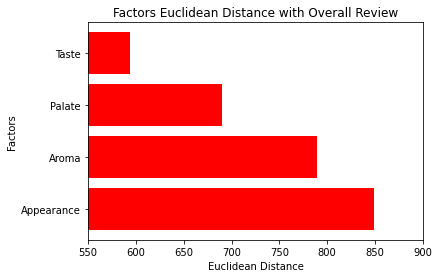

In [50]:
plt.barh(['Appearance', 'Aroma', 'Palate', 'Taste'], [appearance_euclidean_distance, aroma_euclidean_distance, palate_euclidean_distance, taste_euclidean_distance], color = "red")
plt.xlim(550, 900)
plt.xlabel('Euclidean Distance')
plt.ylabel('Factors')
plt.title("Factors Euclidean Distance with Overall Review")

# From these graphs and statistics, we can see that taste has both the highest cosine angle and the smallest euclidean distance 

# <center>Optional

# Next, we can also check the lines of best fit. The closer the slope of the line is to 1, the better the one-to-one conversion is

The slope will be at most 1 since each axis has the same scale


In [127]:
overall_taste_count = beerDataQualityFactors.groupby(['review_overall', 'review_taste']).size().reset_index(name='count')
overall_aroma_count = beerDataQualityFactors.groupby(['review_overall', 'review_aroma']).size().reset_index(name='count')
overall_appearance_count = beerDataQualityFactors.groupby(['review_overall', 'review_appearance']).size().reset_index(name='count')
overall_palate_count = beerDataQualityFactors.groupby(['review_overall', 'review_palate']).size().reset_index(name='count')

m_taste, b_taste = np.polyfit(beerDataQualityFactors['review_overall'], beerDataQualityFactors['review_taste'], deg = 1)
m_aroma, b_aroma = np.polyfit(beerDataQualityFactors['review_overall'], beerDataQualityFactors['review_aroma'], deg = 1)
m_palate, b_palate = np.polyfit(beerDataQualityFactors['review_overall'], beerDataQualityFactors['review_palate'], deg = 1)
m_appearance, b_appearance = np.polyfit(beerDataQualityFactors['review_overall'], beerDataQualityFactors['review_appearance'], deg = 1)


Text(0.5, 1.0, 'Overall vs. Taste')

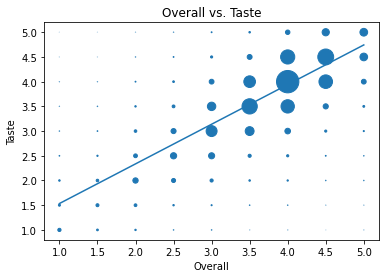

In [169]:

plt.scatter(overall_taste_count['review_overall'], overall_taste_count['review_taste'], s = 500 * overall_taste_count['count']/max(overall_taste_count['count']))
plt.plot(np.arange(1, 5.5, 0.5), np.arange(1, 5.5, 0.5) * m_taste + b_taste)
plt.xlabel("Overall")
plt.ylabel("Taste")
plt.title("Overall vs. Taste")


Text(0.5, 1.0, 'Overall vs. Aroma')

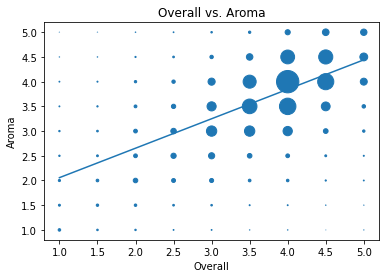

In [182]:
fig, ax = plt.subplots()
scatter = plt.scatter(overall_aroma_count['review_overall'], overall_aroma_count['review_aroma'], s = 500 * overall_aroma_count['count']/max(overall_aroma_count['count']))
# legend1 = ax.legend(*scatter.legend_elements(num=5), loc="upper left", title = "ranking")
plt.plot(np.arange(1, 5.5, 0.5), np.arange(1, 5.5, 0.5) * m_aroma + b_aroma)
plt.xlabel("Overall")
plt.ylabel("Aroma")
plt.title("Overall vs. Aroma")

Text(0.5, 1.0, 'Overall vs. Palate')

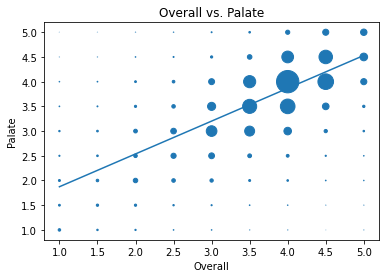

In [155]:
plt.scatter(overall_palate_count['review_overall'], overall_palate_count['review_palate'], s = 500 * overall_palate_count['count']/max(overall_palate_count['count']))
plt.plot(np.arange(1, 5.5, 0.5), np.arange(1, 5.5, 0.5) * m_palate + b_palate)
plt.xlabel("Overall")
plt.ylabel("Palate")
plt.title("Overall vs. Palate")

Text(0.5, 1.0, 'Overall vs. Appearance')

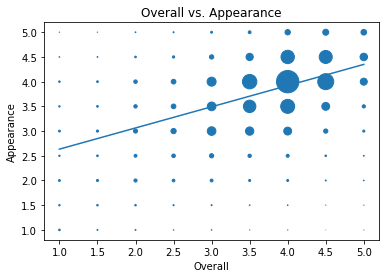

In [157]:
plt.scatter(overall_appearance_count['review_overall'], overall_appearance_count['review_appearance'], s = 500 * overall_appearance_count['count']/max(overall_appearance_count['count']))
plt.plot(np.arange(1, 5.5, 0.5), np.arange(1, 5.5, 0.5) * m_appearance + b_appearance)
plt.xlabel("Overall")
plt.ylabel("Appearance")
plt.title("Overall vs. Appearance")

# As you can see, the slopes of the lines of best fit are becoming more and more gentle/flat. The next visual will make this more clear

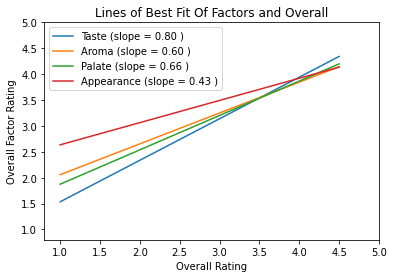

In [149]:
plt.plot(np.arange(1, 5, 0.5), np.arange(1, 5, 0.5) * m_taste + b_taste)

plt.plot(np.arange(1, 5, 0.5), np.arange(1, 5, 0.5) * m_aroma + b_aroma)

plt.plot(np.arange(1, 5, 0.5), np.arange(1, 5, 0.5) * m_palate + b_palate)

plt.plot(np.arange(1, 5, 0.5), np.arange(1, 5, 0.5) * m_appearance + b_appearance)

plt.xlim(0.80, 5)
plt.ylim(0.80, 5)
plt.xlabel("Overall Rating")
plt.ylabel("Overall Factor Rating")
plt.title("Lines of Best Fit Of Factors and Overall")
plt.legend(['Taste (slope = %.2f )' % m_taste, 'Aroma (slope = %.2f )' % m_aroma, 'Palate (slope = %.2f )' % m_palate, 'Appearance (slope = %.2f )' % m_appearance])

From these graphs and statistics, you can see that the slope of the taste vs the overall rating has the largest slope value and is therefore has the best one-to-one conversion to the overall rating

# We can conclude that "taste" is most important in determining the overall quality of a beer

# <h1><center>QUESTION 4</center></h1>
# Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?
<br>

In [ ]:
beerAromaAppearance = beerData.loc[:, ['beer_style', 'review_aroma', 'review_appearance']]

Obtain the necessary variables (Beer Style, Review Aroma, and Review Appearance) by using grouping operations

In [ ]:
beerAromaAppearanceCount  = beerData.groupby(by = 'beer_style', as_index=False)['brewery_name'].count()
beerAromaAppearanceCount.rename(columns={'brewery_name': 'count'}, inplace=True) 

Get the amount of reviews for each beer style 

In [164]:
groupedAromaAppearance = beerAromaAppearance.groupby(by = 'beer_style', as_index=False).aggregate({'review_aroma': 'mean', 'review_appearance' : ['mean', 'count']})
groupedAromaAppearance.columns = ["beer_style", "review_aroma_mean", "review_appearance_mean", "num_reviews"]

Get the mean value of the aroma and appearance reviews for each beer style
<br>Get the number of reviews for each beer style

In [ ]:
belowNumber100ReviewIndex = groupedAromaAppearance[groupedAromaAppearance['num_reviews'] < 100]
if(len(belowNumber100ReviewIndex) != 0):
    groupedAromaAppearance.drop(belowNumber100ReviewIndex, inplace=True)

If necessary, remove any beer styles with an insufficient number of reviews. 100 is an arbitrary number

In [ ]:
groupedAromaAppearance['review_aroma_appearance_sum'] = groupedAromaAppearance.apply(lambda x: x['review_aroma_mean'] + x['review_appearance_mean'], axis = 1)

Add together the means of the aroma and appearance reviews
<br>This will create a single value that will combine both aroma and appearance (both weighted evenly) for simpler evaluation
<br>Getting the means or multiplication of the two means would work just as well

In [ ]:
topTenSortedGroupedAromaAppearance = groupedAromaAppearance.sort_values(['review_aroma_appearance_sum'], ascending=False).head(10)

For visualization, get the top ten beer styles with combined aroma and appearance

In [165]:
topTenSortedGroupedAromaAppearance

,beer_style,review_aroma_mean,review_appearance_mean,num_reviews,review_aroma_appearance_sum
11,American Double / Imperial Stout,4.159607,4.162627,49838,8.322234
89,Russian Imperial Stout,4.075823,4.207959,52972,8.283782
86,Quadrupel (Quad),4.132202,4.118076,17980,8.250278
9,American Double / Imperial IPA,4.095410,4.077118,84462,8.172527
63,Gueuze,4.116767,4.034353,5982,8.151120
20,American Wild Ale,4.125128,4.004029,17622,8.129157
41,Eisbock,4.155778,3.963557,2648,8.119335
4,American Barleywine,4.018423,4.035790,26488,8.054213
23,Belgian IPA,3.978969,4.075168,12339,8.054137
100,Weizenbock,4.043327,4.008087,9336,8.051414


Text(0.5, 1.0, 'Top Ten Beer Styles By Aroma and Appearance Ratings')

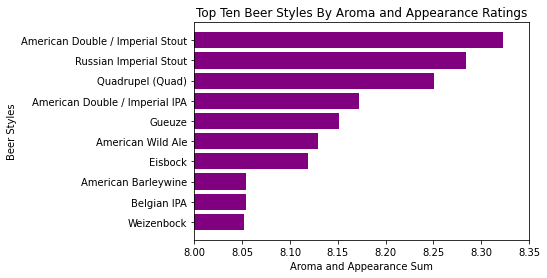

In [166]:
plt.barh(topTenSortedGroupedAromaAppearance.sort_values(by='review_aroma_appearance_sum')['beer_style'], topTenSortedGroupedAromaAppearance.sort_values(by = 'review_aroma_appearance_sum')['review_aroma_appearance_sum'], color = "purple")
plt.xlim(8, 8.35)
plt.xlabel("Aroma and Appearance Sum")
plt.ylabel("Beer Styles")
plt.title("Top Ten Beer Styles By Aroma and Appearance Ratings")

We can see here visually that American Double / Imperial Stout has the highest summation when considering just aroma and appearance only with both weighed the same

# So based on the data, the recommendation would be "American Double / Imperial Stout" to people who enjoy a beer due to its aroma and appearance